In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D
from keras.layers import MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [2]:
train_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/train/"
test_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/"
val_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/val/"

In [3]:
x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
        
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):
    
    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
test_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
val_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [6]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [7]:
training_set.class_indices

train_y.shape,test_y.shape,val_y.shape

((2000,), (251,), (250,))

In [8]:
IMAGE_SIZE = [224, 224]

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.optimizers import Adagrad
opt = Adagrad(learning_rate=0.001)
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=opt,
  metrics=["accuracy"]
)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [12]:
import tensorflow as tf
with tf.device("cpu:0"):
    history = model.fit(
        train_x,
        train_y,
        validation_data=(val_x,val_y),
        epochs=10,
        callbacks=[early_stop],
        batch_size=32,shuffle=True)

Epoch 1/10
63/63 [==============================] - 206s 3s/step - loss: 0.6830 - accuracy: 0.6070 - val_loss: 0.6725 - val_accuracy: 0.6200
Epoch 2/10
63/63 [==============================] - 201s 3s/step - loss: 0.5821 - accuracy: 0.6845 - val_loss: 0.5696 - val_accuracy: 0.6720
Epoch 3/10
63/63 [==============================] - 200s 3s/step - loss: 0.5404 - accuracy: 0.7255 - val_loss: 0.5732 - val_accuracy: 0.7160
Epoch 4/10
63/63 [==============================] - 196s 3s/step - loss: 0.5053 - accuracy: 0.7570 - val_loss: 0.5288 - val_accuracy: 0.7280
Epoch 5/10
63/63 [==============================] - 196s 3s/step - loss: 0.4884 - accuracy: 0.7725 - val_loss: 0.5355 - val_accuracy: 0.6920
Epoch 6/10
63/63 [==============================] - 197s 3s/step - loss: 0.4719 - accuracy: 0.7790 - val_loss: 0.5060 - val_accuracy: 0.7480
Epoch 7/10
63/63 [==============================] - 196s 3s/step - loss: 0.4533 - accuracy: 0.8005 - val_loss: 0.5067 - val_accuracy: 0.7200
Epoch 8/10
63

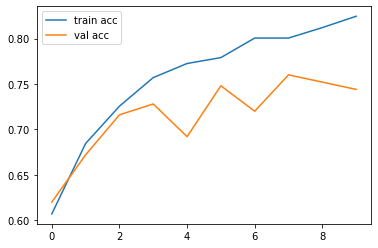

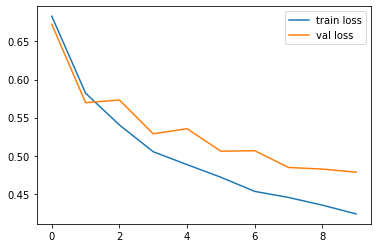

In [13]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('C:/Users/atulp/Downloads/Final Review/3rd Review Work/PLOTs/VGG19/Adagrad VGG19/vgg19-acc-rps.png')
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('C:/Users/atulp/Downloads/Final Review/3rd Review Work/PLOTs/VGG19/Adagrad VGG19/vgg19-loss-rps.png')
plt.show()

In [14]:
history.history

{'loss': [0.6829515099525452,
  0.5820742845535278,
  0.5404274463653564,
  0.5053032040596008,
  0.4884043335914612,
  0.4718584716320038,
  0.4533349573612213,
  0.44537678360939026,
  0.43528807163238525,
  0.42379680275917053],
 'accuracy': [0.6069999933242798,
  0.684499979019165,
  0.7254999876022339,
  0.7570000290870667,
  0.7724999785423279,
  0.7789999842643738,
  0.8004999756813049,
  0.8004999756813049,
  0.8119999766349792,
  0.8245000243186951],
 'val_loss': [0.6724675297737122,
  0.569550096988678,
  0.5731725096702576,
  0.5287983417510986,
  0.5355006456375122,
  0.5059985518455505,
  0.5067028403282166,
  0.48468977212905884,
  0.4825897216796875,
  0.4784994125366211],
 'val_accuracy': [0.6200000047683716,
  0.671999990940094,
  0.7160000205039978,
  0.7279999852180481,
  0.6919999718666077,
  0.7480000257492065,
  0.7200000286102295,
  0.7599999904632568,
  0.7519999742507935,
  0.7440000176429749]}

In [15]:
model.evaluate(test_x,test_y,batch_size=32)

8/8 [==============================] - 22s 3s/step - loss: 0.4768 - accuracy: 0.7570


[0.476762980222702, 0.7569721341133118]

In [16]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_pred,test_y)

0.7569721115537849

In [18]:
recall_score(y_pred,test_y)

0.8035714285714286

In [19]:
precision_score(y_pred,test_y)

0.47368421052631576

In [20]:
f1_score(y_pred,test_y)

0.5960264900662252

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

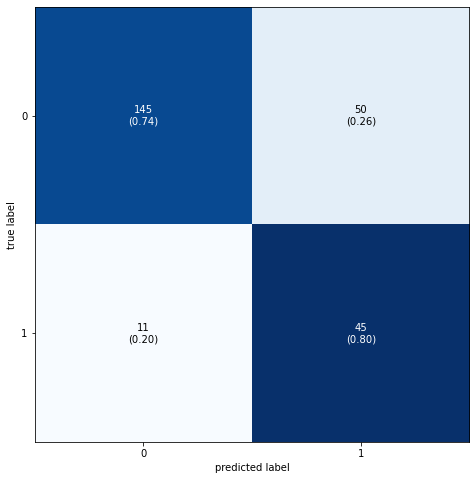

In [21]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred,test_y)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8),show_normed=True)

In [22]:
model.save(filepath='C:/Users/atulp/OptimizersBrainStroke/Vgg19 Model/Vgg19 Adagrad/Vgg19modelAugmented.h5')

In [23]:
import cv2
from tensorflow.keras.preprocessing import image
opt = Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

#load the image you want to classify

image = cv2.imread("C:/Users/atulp/Optimizers Brain Stroke/Brain Stroke DATA/test/Stroke/ (23).jpg")

image = cv2.resize(image, (224,224))

plt.imshow(image)

#predict the image

preds = model.predict(np.expand_dims(image, axis=0))[0]

print('Predicted Label',preds)

#model.predict("C:/Users/atulp/Optimizers Brain Stroke/Brain Stroke DATA/test/Stroke/69 (2).jpg")



error: C:\ci\opencv_1512688052760\work\modules\imgproc\src\resize.cpp:3289: error: (-215) ssize.width > 0 && ssize.height > 0 in function cv::resize


Stroke


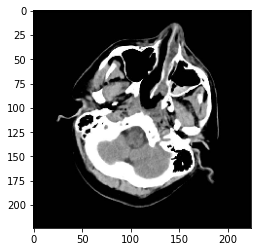

In [25]:
from keras.preprocessing import image
img = image.load_img("C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/Stroke/83 (11).jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("C:/Users/atulp/OptimizersBrainStroke/Vgg19 Model/Vgg19 Adagrad/Vgg19modelAugmented.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Stroke")
else:
    print('Not Stroke')